In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [5]:
df = pd.read_csv("data.csv", encoding='ISO-8859-1')
print(df.head())
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [6]:
# Drop rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Remove canceled orders (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Create binary target: IsPurchase (1 = valid purchase)
df['IsPurchase'] = 1  # since canceled invoices are removed

# Feature Engineering
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.weekday

# Select features
features = ['Quantity', 'UnitPrice', 'Hour', 'Weekday', 'Country']
df = df[features + ['IsPurchase']]

In [7]:
# Encode categorical variable 'Country'
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# Split features and target
X = df.drop('IsPurchase', axis=1)
y = df['IsPurchase']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Machine learning: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier Results")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Results
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     79585

    accuracy                           1.00     79585
   macro avg       1.00      1.00      1.00     79585
weighted avg       1.00      1.00      1.00     79585



In [9]:
# Deep learning: Feedforward Neural Network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
y_pred_dl = (model.predict(X_test) > 0.5).astype(int)

print("Deep Learning Model Results")
print(classification_report(y_test, y_pred_dl))

Epoch 1/10
9949/9949 [==============================] - 20s 2ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 1.3295e-08 - val_accuracy: 1.0000
Epoch 2/10
9949/9949 [==============================] - 19s 2ms/step - loss: 4.7119e-08 - accuracy: 1.0000 - val_loss: 1.5327e-11 - val_accuracy: 1.0000
Epoch 3/10
9949/9949 [==============================] - 19s 2ms/step - loss: 5.1035e-10 - accuracy: 1.0000 - val_loss: 7.6754e-13 - val_accuracy: 1.0000
Epoch 4/10
9949/9949 [==============================] - 17s 2ms/step - loss: 1.3855e-10 - accuracy: 1.0000 - val_loss: 2.3184e-13 - val_accuracy: 1.0000
Epoch 5/10
9949/9949 [==============================] - 17s 2ms/step - loss: 6.2547e-11 - accuracy: 1.0000 - val_loss: 1.3243e-13 - val_accuracy: 1.0000
Epoch 6/10
9949/9949 [==============================] - 18s 2ms/step - loss: 4.4833e-11 - accuracy: 1.0000 - val_loss: 8.5954e-14 - val_accuracy: 1.0000
Epoch 7/10
9949/9949 [==============================] - 23s 2ms/step - loss: 2.2834e-0

Accuracy (Random Forest): 1.0
Accuracy (Deep Learning): 1.0


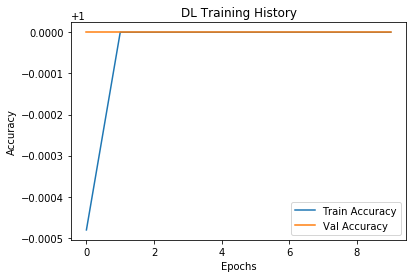

In [10]:
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Accuracy (Deep Learning):", accuracy_score(y_test, y_pred_dl.flatten()))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('DL Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()